In [101]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [102]:
path = "http://www.iam.fmph.uniba.sk/ospm/Rosa/PDV/01_nhanes-weight.xls"
#path = "01_nhanes-weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
data["Age"] = data["Age"]/12
data = data.dropna()

data

Gender        Age  Weight  Height  Leg_Length  Arm_Length  Arm_circum  \
0          0  20.083333    64.7     163        34.2        36.2        29.0   
1          0  20.083333    54.0     153        37.2        34.0        26.1   
2          1  20.083333    61.4     165        37.7        35.0        31.4   
3          0  20.083333    74.0     171        37.9        36.2        29.8   
4          0  20.083333    63.6     159        38.1        34.0        29.2   
...      ...        ...     ...     ...         ...         ...         ...   
4974       1  79.833333    89.5     184        43.0        42.8        32.2   
4975       0  79.916667    78.6     151        35.6        34.2        33.5   
4976       1  79.916667    86.5     175        38.6        41.5        32.8   
4977       0  79.916667    58.0     163        40.2        37.5        26.2   
4978       1  79.916667    76.2     168        40.8        39.5        29.8   

      Waist  
0      89.6  
1      85.5  
2      70.1  
3      91.1  
4      74.3  
...     ...  
4974  112.8  
4975  114.9  
4976  100.2  
4977   82.8  
4978  103.5  

[4978 rows x 8 columns]

In [103]:
Y = data["Weight"]

X = data.copy(deep=True)
X.drop(labels="Weight",axis=1,inplace=True)

# Trenovacia, validacna a testovacia (70-20-10)

# Najprv 70-30: train a (val+test)
X_train, X_other, y_train, y_other = train_test_split(X, Y, test_size=0.3)

# Potom 2/3 vs 1/3 val a test
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=1/3)

print(X_train)
print("train:", X_train.shape)
print("val:",X_val.shape)
print("test:",X_test.shape)

      Gender        Age  Height  Leg_Length  Arm_Length  Arm_circum  Waist
2369       0  47.083333     159        34.8        34.2        23.1   74.7
742        1  29.083333     168        40.3        36.3        30.4   80.1
390        0  24.750000     157        37.0        33.9        28.2   77.0
1581       0  38.500000     170        38.5        36.5        37.9  124.3
2185       1  45.166667     176        44.1        38.6        42.5  107.6
...      ...        ...     ...         ...         ...         ...    ...
1710       1  39.666667     184        42.6        40.2        33.8   96.9
4026       0  65.333333     158        34.0        36.0        32.1   96.2
1569       0  38.416667     162        37.5        35.8        28.7   72.8
4197       1  67.666667     175        39.3        39.0        28.0  101.8
18         1  20.250000     173        40.4        39.6        31.5   92.1

[3484 rows x 7 columns]
train: (3484, 7)
val: (996, 7)
test: (498, 7)


In [104]:
# Linearna regresia
lm = LinearRegression()
lm.fit(X_train, y_train)

# Parametre
lm.intercept_, lm.coef_

(-130.3145770747519,
 array([-2.19576273, -0.08540148,  0.54287867,  0.22322429, -0.14284018,
         1.54670543,  0.72392587]))

In [105]:
ridge_reg = Ridge(alpha=50.0) # alpha je lambda
ridge_reg.fit(X_train, y_train)

ridge_reg.intercept_, ridge_reg.coef_

(-129.14934584324047,
 array([-1.98146883, -0.08624902,  0.53540212,  0.22173892, -0.1395432 ,
         1.54223346,  0.72497806]))

In [106]:
# norma odhadov MNS, Ridge (bez interceptu)
sum((lm.coef_)**2), sum((ridge_reg.coef_)**2)

(8.109983371285633, 7.193030727558635)

In [107]:
# Predikcie
y_pred_lm = lm.predict(X_val)
y_pred_ridge = ridge_reg.predict(X_val)

# MSE val
MSE_lm = mean_squared_error(y_val, y_pred_lm)
MSE_ridge = mean_squared_error(y_val, y_pred_ridge)

print(f"MSE lm: {MSE_lm:.4f}, MSE ridge: {MSE_ridge:.4f}")

MSE lm: 25.4027, MSE ridge: 25.4349


Text(0, 0.5, 'Validacna chyba')

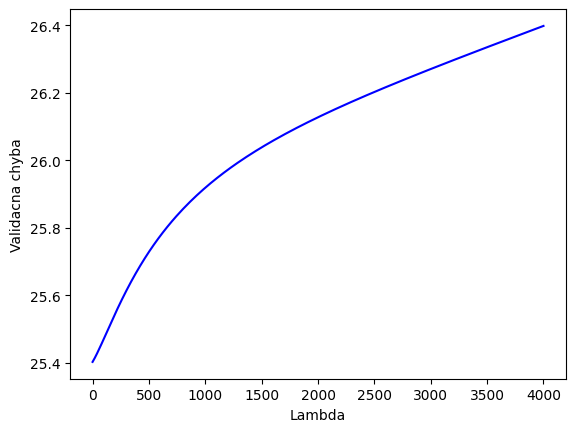

In [108]:
# Pre rozne hodnoty lambda
alphas = np.linspace(0.1, 4000.1, 200) # hodnoty lambdy

MSEs_ridge = np.zeros(200)
i = 0

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_val)
    MSEs_ridge[i]= mean_squared_error(y_val, y_pred)
    i = i + 1

plt.plot(alphas, MSEs_ridge, linestyle='-', color='b', label='Test MSE')
plt.xlabel('Lambda')
plt.ylabel('Validacna chyba')

In [109]:
# Najlepsia lambda krosvalidaciou
ridge_cv = RidgeCV(alphas=alphas, cv=10) # K=10 foldov
ridge_cv.fit(X_train, y_train)

# najlepsia lambda krosvalidaciou
ridge_cv.alpha_

0.1

In [110]:
# Prislusne odhady biet (bez interceptu)
print(lm.intercept_, lm.coef_)
print(ridge_cv.intercept_, ridge_cv.coef_)

-130.3145770747519 [-2.19576273 -0.08540148  0.54287867  0.22322429 -0.14284018  1.54670543
  0.72392587]
-130.3120045250963 [-2.19528846 -0.08540331  0.54286222  0.22322108 -0.14283352  1.54669615
  0.72392807]


In [111]:
# Lasso (rovno CV)
lasso_cv = LassoCV(cv=10) # lambdy na zvazenie si zvoli automaticky
lasso_cv.fit(X_train, y_train)

# najlepsia lambda pre lasso
lasso_cv.alpha_

0.28527589158936845

In [112]:
# odhady biet
print(lm.intercept_, lm.coef_)
print(lasso_cv.intercept_, lasso_cv.coef_) # vsimnite si nulu

-130.3145770747519 [-2.19576273 -0.08540148  0.54287867  0.22322429 -0.14284018  1.54670543
  0.72392587]
-118.06029922009557 [-0.         -0.09658881  0.45453984  0.16694226 -0.          1.49083986
  0.73058864]


In [113]:
# Predikcie na Test
y_pred_lm = lm.predict(X_test)
MSEtest_lm = mean_squared_error(y_test, y_pred_lm)

y_pred_ridge_cv = ridge_cv.predict(X_test)
MSEtest_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)

y_pred_lasso = lasso_cv.predict(X_test)
MSEtest_lasso_cv = mean_squared_error(y_test, y_pred_lasso)

print(f"MSE lm: {MSEtest_lm:.4f}, MSE ridge: {MSEtest_ridge_cv:.4f}, MSE lasso: {MSEtest_lasso_cv:.4f}")

MSE lm: 20.7447, MSE ridge: 20.7449, MSE lasso: 21.8625
